In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data paths
cb = "/home/harlan/ucsb/projects/exos_internship/CryptoStrat_Internship/connector/cpp/coinbase/"

rj_cb_e = pd.read_csv(cb+"timing_rapidjson/midday/timing_60s_everything_type.csv")[:5200]
rj_cb_n = pd.read_csv(cb+"timing_rapidjson/midday/timing_60s_nothing.csv")[:5200]
rj_cb_j = pd.read_csv(cb+"timing_rapidjson/midday/timing_60s_just_json.csv")[:5200]

In [3]:
# coinbase with rapidjson

In [4]:
print("average processing time to read buffer, determine timestamps, ORE, etc, in ns:\n")
print("everything: ", np.mean(rj_cb_e["processing_time_ns"]))
print("only reading and then draining the buffer: ", np.mean(rj_cb_n["processing"]))
print("reading the buffer, converting to json then draining: ", np.mean(rj_cb_j["processing"]))

print()

print("average (everything) time based on message type:")
l2update = rj_cb_e.loc[rj_cb_e["msg_type"] == "l2update"]
match = rj_cb_e.loc[rj_cb_e["msg_type"] == "match"]
print("match: ", np.mean(match["processing_time_ns"]))
print("l2update: ", np.mean(l2update["processing_time_ns"]))

average processing time to read buffer, determine timestamps, ORE, etc, in ns:

everything:  15663.33826923077
only reading and then draining the buffer:  126.9048076923077
reading the buffer, converting to json then draining:  5605.744230769231

average (everything) time based on message type:
match:  9281.109375
l2update:  12967.067783404753


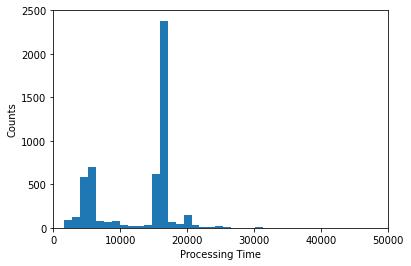

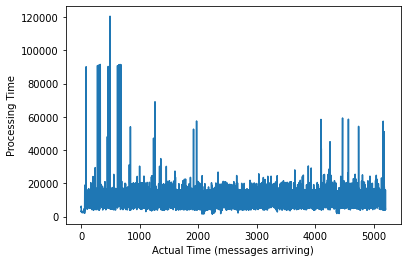

In [5]:
# histogram the data
plt.hist(rj_cb_e["processing_time_ns"][1:], density=False, bins = 100)  
plt.ylabel('Counts')
plt.xlabel('Processing Time')
#plt.ylim(-2, 2)
plt.xlim(0,50000)
plt.show()

# processing durations in time
plt.plot(rj_cb_e["processing_time_ns"][1:])
plt.ylabel('Processing Time')
plt.xlabel('Actual Time (messages arriving)')
plt.show()

buffer read time is the tic before 'read(buffer)' and right after:

time spent waiting (everything):  9626240.094423076
time spent waiting (nothing):  4061577.2738461536
time spent waiting (just json):  9262615.143653845


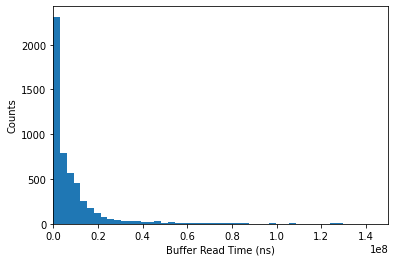

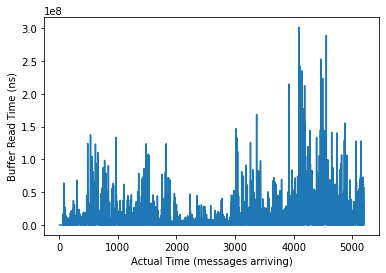

In [6]:
# buffer reads
print("buffer read time is the tic before 'read(buffer)' and right after:\n")
print("time spent waiting (everything): ", np.mean(rj_cb_e["buff_read_ns"]))
print("time spent waiting (nothing): ", np.mean(rj_cb_n["buffer_read"]))
print("time spent waiting (just json): ", np.mean(rj_cb_j["buffer_read"]))

# histogram the data
plt.hist(rj_cb_e["buff_read_ns"][1:], density=False, bins = 100)  
plt.ylabel('Counts')
plt.xlabel('Buffer Read Time (ns)')
#plt.ylim(-2, 2)
plt.xlim(0,150000000)
plt.show()

# processing durations in time
plt.plot(rj_cb_e["buff_read_ns"][1:])
plt.xlabel('Actual Time (messages arriving)')
plt.ylabel('Buffer Read Time (ns)')
plt.show()

In [7]:
# local client/server with rapidjson

In [8]:
local = "/home/harlan/ucsb/projects/exos_internship/CryptoStrat_Internship/connector/cpp/client-sync/"

rj_loc_e = pd.read_csv(local+"timing_rapidjson/timing_60s_everything_type.csv")

In [9]:
print("average processing time to read buffer, determine timestamps, ORE, etc, in ns:\n")
print("everything: ", np.mean(rj_loc_e["processing_time_ns"]))

print()

print("average (everything) time based on message type:\n")
l2update = rj_cb_e.loc[rj_loc_e["msg_type"] == "l2update"]
match = rj_cb_e.loc[rj_loc_e["msg_type"] == "match"]
print("match: ", np.mean(match["processing_time_ns"]))
print("l2update: ", np.mean(l2update["processing_time_ns"]))

average processing time to read buffer, determine timestamps, ORE, etc, in ns:

everything:  15088.841715828417

average (everything) time based on message type:

match:  12954.111153846154
l2update:  12886.407464409389


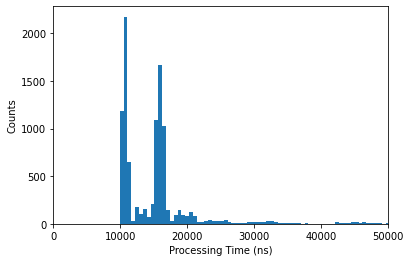

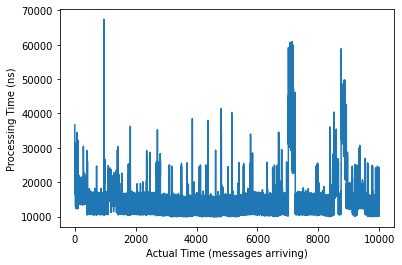

In [10]:
# histogram the data
plt.hist(rj_loc_e["processing_time_ns"][1:], density=False, bins = 100)  
plt.ylabel('Counts')
plt.xlabel('Processing Time (ns)')
#plt.ylim(-2, 2)
plt.xlim(0,50000)
plt.show()

# processing durations in time
plt.plot(rj_loc_e["processing_time_ns"][1:])
plt.xlabel('Actual Time (messages arriving)')
plt.ylabel('Processing Time (ns)')
plt.show()

In [11]:
"""# buffer reads
print("buffer read time is the tic before 'read(buffer)' and right after")
print("time spent waiting (everything): ", np.mean(rj_loc_e["buff_read_ns"]))

# histogram the data
plt.hist(rj_loc_e["buff_read_ns"][1:], density=False, bins = 100)  
plt.ylabel('Counts')
plt.xlabel('Data')
#plt.ylim(-2, 2)
#plt.xlim(0,150000000)
plt.show()

# processing durations in time
plt.plot(rj_loc_e["buff_read_ns"][1:])
plt.show()"""

'# buffer reads\nprint("buffer read time is the tic before \'read(buffer)\' and right after")\nprint("time spent waiting (everything): ", np.mean(rj_loc_e["buff_read_ns"]))\n\n# histogram the data\nplt.hist(rj_loc_e["buff_read_ns"][1:], density=False, bins = 100)  \nplt.ylabel(\'Counts\')\nplt.xlabel(\'Data\')\n#plt.ylim(-2, 2)\n#plt.xlim(0,150000000)\nplt.show()\n\n# processing durations in time\nplt.plot(rj_loc_e["buff_read_ns"][1:])\nplt.show()'

In [17]:
print("median processing time (ns): ", df["processing_time_ns"].median())
print("median buffer read time (ns): ", df["buff_read_ns"].median())
rj_loc_e

median processing time (ns):  15324.0
median buffer read time (ns):  1925.0


,msg_type,processing_time_ns,buff_read_ns
0,snapshot,475529,1916059
1,match,36710,5045
2,l2update,20892,3468
3,match,28677,8539
4,l2update,18747,3020
...,...,...,...
9996,l2update,10477,1642
9997,match,24310,1910
9998,l2update,10565,1702
9999,match,15396,1807


In [21]:
per = rj_loc_e["processing_time_ns"].sum()  / (rj_loc_e["processing_time_ns"].sum() + rj_loc_e["buff_read_ns"].sum())
print("percent of time spent in processing message: ", per)
print("outliers account for a lot of this: ", (89777818 + 51285618) * 1e-9)

idx = rj_loc_e['processing_time_ns'] < rj_loc_e['buff_read_ns']
rj_loc_e[idx]

percent of time spent in processing message:  0.47305059665168897
outliers account for a lot of this:  0.14106343600000001


,msg_type,processing_time_ns,buff_read_ns
0,snapshot,475529,1916059
34,l2update,14725,21498
316,l2update,16864,30761
806,l2update,13433,24282
966,l2update,12967,15691
1287,match,22759,27097
1454,l2update,13293,17465
1782,l2update,12708,23810
1942,l2update,13404,16506
2270,l2update,13354,26392
